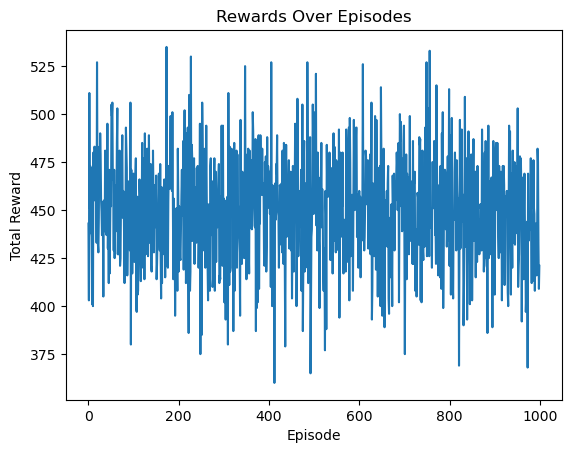

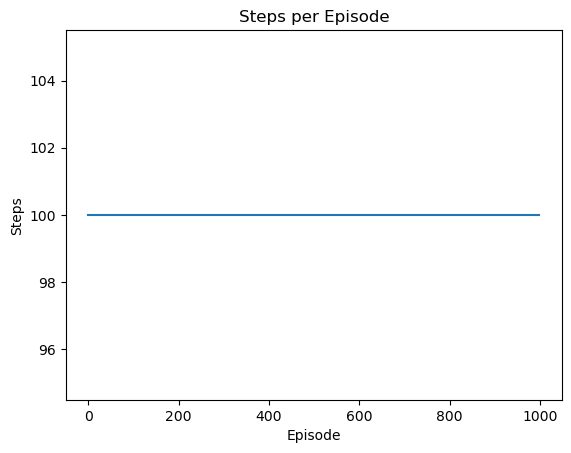

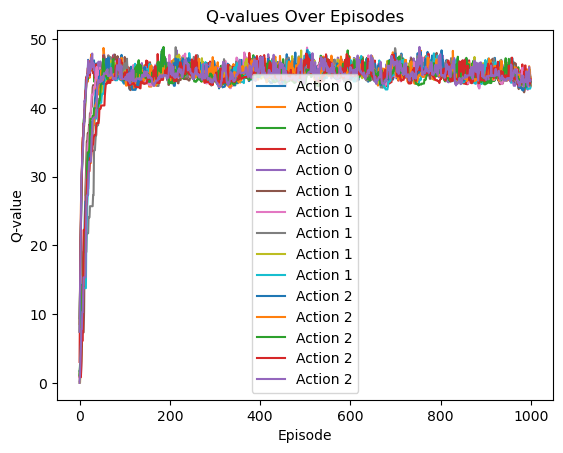

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
num_states = 5
num_actions = 3
Q = np.zeros((num_states, num_actions))  # Q-table initialization

# Q-Learning parameters
alpha = 0.1  # learning rate
gamma = 0.9  # discount factor
epsilon = 0.1  # exploration-exploitation trade-off

# Lists to store rewards and Q-values for visualization
episode_rewards = []
episode_steps = []
q_value_updates = []

# Define a function to choose an action using epsilon-greedy policy
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(num_actions)  # exploration
    else:
        return np.argmax(Q[state, :])  # exploitation

# Define a function to update the Q-values
def update_q_value(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state, :])
    Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action])

# Simulate the environment (you need to replace this with your own data or environment)
num_episodes = 1000
for episode in range(num_episodes):
    state = np.random.randint(0, num_states)  # initial state
    total_reward = 0
    for step in range(100):  # limit the number of steps per episode
        action = choose_action(state)
        # Simulate the environment and get the reward and next state (replace this with your own logic)
        reward = np.random.randint(0, 10)
        next_state = np.random.randint(0, num_states)
        total_reward += reward
        # Update the Q-values
        update_q_value(state, action, reward, next_state)
        state = next_state

    # Store results for visualization
    episode_rewards.append(total_reward)
    episode_steps.append(step + 1)  # 1-indexed
    q_value_updates.append(np.copy(Q))  # Store a copy of Q-values for each episode

# Visualize rewards over episodes
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards Over Episodes')
plt.show()

# Visualize steps per episode
plt.plot(episode_steps)
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.title('Steps per Episode')
plt.show()

# Visualize Q-values over episodes
q_value_updates = np.array(q_value_updates)
for action in range(num_actions):
    plt.plot(q_value_updates[:, :, action], label=f'Action {action}')
plt.xlabel('Episode')
plt.ylabel('Q-value')
plt.title('Q-values Over Episodes')
plt.legend()
plt.show()


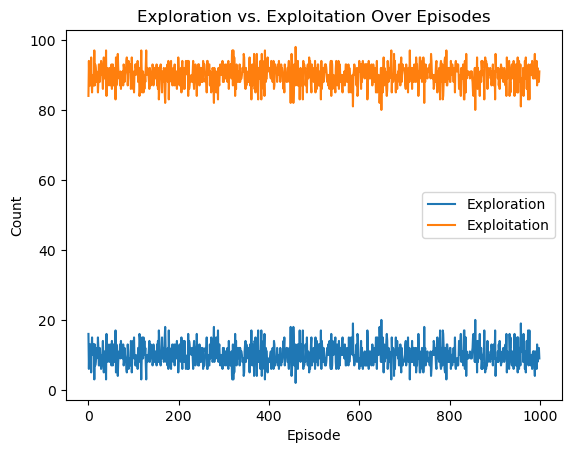

In [5]:
# Count exploration vs. exploitation
exploration_counts = []
exploitation_counts = []

for episode in range(num_episodes):
    state = np.random.randint(0, num_states)  # initial state
    exploration_count = 0
    exploitation_count = 0

    for step in range(100):  # limit the number of steps per episode
        action = choose_action(state)
        if np.random.rand() < epsilon:
            exploration_count += 1
        else:
            exploitation_count += 1

        # Simulate the environment and get the reward and next state (replace this with your own logic)
        reward = np.random.randint(0, 10)
        next_state = np.random.randint(0, num_states)
        state = next_state

    exploration_counts.append(exploration_count)
    exploitation_counts.append(exploitation_count)

# Visualize exploration vs. exploitation
plt.plot(exploration_counts, label='Exploration')
plt.plot(exploitation_counts, label='Exploitation')
plt.xlabel('Episode')
plt.ylabel('Count')
plt.title('Exploration vs. Exploitation Over Episodes')
plt.legend()
plt.show()


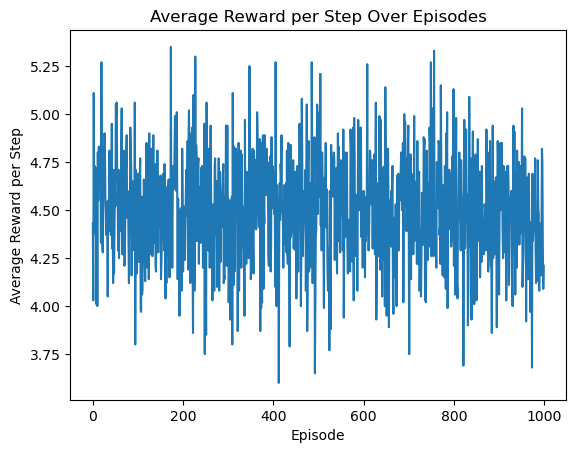

In [6]:
# Calculate average reward per step
avg_reward_per_step = np.array(episode_rewards) / np.array(episode_steps)

# Visualize average reward per step
plt.plot(avg_reward_per_step)
plt.xlabel('Episode')
plt.ylabel('Average Reward per Step')
plt.title('Average Reward per Step Over Episodes')
plt.show()


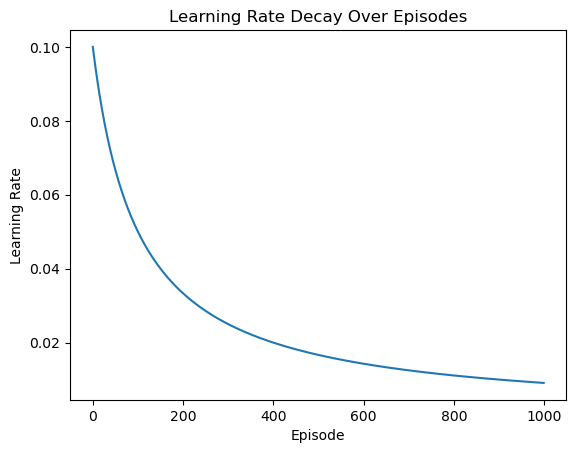

In [7]:
# Learning rate decay example
decayed_learning_rate = [alpha * (1 / (1 + 0.01 * episode)) for episode in range(num_episodes)]

# Visualize learning rate decay
plt.plot(decayed_learning_rate)
plt.xlabel('Episode')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Decay Over Episodes')
plt.show()
